# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

import dataset as ds

In [2]:
# Define parameters preliminary
file_path = "data/raw/FINFSTA_TOYOTA_199703_202004.csv"

earning_v = ['売上高・営業収益', '売上総利益', '営業利益', '経常利益／税金等調整前当期純利益', '当期純利益（連結）', '１株当たり利益']
account_v_bs = ['棚卸資産', '資本的支出', '期末従業員数', '受取手形・売掛金／売掛金及びその他の短期債権']
account_v_pl = ['販売費及び一般管理費']

num_col = ['決算月数'] + [i + '［累計］' for i in earning_v + account_v_pl] + [i + '［３ヵ月］' for i in earning_v + account_v_pl] + account_v_bs
num_col = dict(zip(num_col, ["float64"] * len(num_col)))

date_col = ['決算期', '決算発表日']

In [9]:
# Instanciate Dataset class
dataset = ds.Dataset(file_path)
dataset.cleaning()
dataset.change_data_types(date_col, num_col)
dataset.cut()

In [10]:
dataset.data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,決算期,決算月数,連結基準フラグ,決算種別フラグ,決算発表日,売上高・営業収益［累計］,...,潜在株式調整後１株当たり利益［累計］,潜在株式調整後１株当たり利益（遡及調整後）［累計］,潜在株式調整後１株当たり利益［３ヵ月］,潜在株式調整後１株当たり利益（遡及調整後）［３ヵ月］,棚卸資産,資本的支出,期末従業員数,販売費及び一般管理費［累計］,販売費及び一般管理費［３ヵ月］,受取手形・売掛金／売掛金及びその他の短期債権
0,月次(M),2002/06,トヨタ自動車,T7203,2002-06-01,3.0,1,21,2002-08-07,4021134.0,...,NaN,NaN,NaN,NaN,960431.0,NaN,NaN,585942.0,585942.0,1292182.0
1,月次(M),2002/09,トヨタ自動車,T7203,2002-09-01,6.0,2,22,2002-12-26,7613422.0,...,118.44,NaN,NaN,NaN,927040.0,808702.0,NaN,1135559.0,NaN,1245733.0
2,月次(M),2002/12,トヨタ自動車,T7203,2002-12-01,9.0,1,23,2003-02-05,12073459.0,...,221.67,NaN,62.94,NaN,1042173.0,NaN,NaN,NaN,636567.0,1339274.0
3,月次(M),2003/03,トヨタ自動車,T7203,2003-03-01,12.0,2,10,2003-07-31,15501553.0,...,211.32,NaN,NaN,NaN,1025838.0,1610229.0,NaN,2315662.0,NaN,1475797.0
4,月次(M),2003/06,トヨタ自動車,T7203,2003-06-01,3.0,2,21,2003-08-05,4092939.0,...,NaN,NaN,NaN,NaN,1054208.0,NaN,NaN,612864.0,612864.0,1335846.0


In [11]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  72 non-null     object        
 1   Unnamed: 1                  72 non-null     object        
 2   Unnamed: 2                  72 non-null     object        
 3   Unnamed: 3                  72 non-null     object        
 4   決算期                         72 non-null     datetime64[ns]
 5   決算月数                        72 non-null     float64       
 6   連結基準フラグ                     72 non-null     object        
 7   決算種別フラグ                     72 non-null     object        
 8   決算発表日                       72 non-null     datetime64[ns]
 9   売上高・営業収益［累計］                72 non-null     float64       
 10  売上総利益［累計］                   67 non-null     float64       
 11  営業利益［累計］                    72 non-null     float64       
 

In [13]:
# generate quarterly data by subtracting cumsum
dataset.to_quarter(earning_v + account_v_pl)

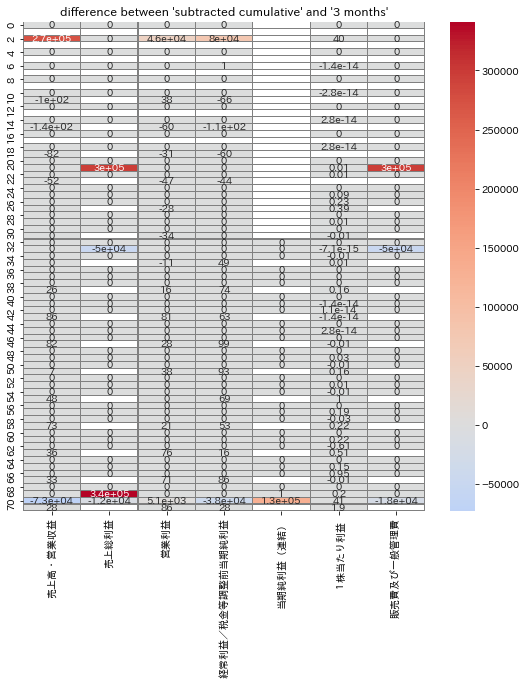

In [14]:
# cumulated to quater compare with [3ヶ月]
diff = pd.DataFrame(
    data = (
        dataset.data[[i for i in earning_v + account_v_pl]].values -
        dataset.data[[i + "［３ヵ月］" for i in earning_v + account_v_pl]].values
    ),
    columns = earning_v + account_v_pl
)

diff

# Visualize
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(diff, cmap="coolwarm", center=0, linewidths=.05, linecolor="gray", annot=True)
ax.set_title("difference between 'subtracted cumulative' and '3 months'")
plt.show()

In [15]:
# So much difference, 
2.7e+05 # Million JPY

270000.0

In [16]:
# WHY?
dataset.data[["売上高・営業収益", "売上高・営業収益［３ヵ月］"]].iloc[0:3]

,売上高・営業収益,売上高・営業収益［３ヵ月］
0,4021134.0,4021134.0
1,3592288.0,NaN
2,4460037.0,4186777.0


売上総利益


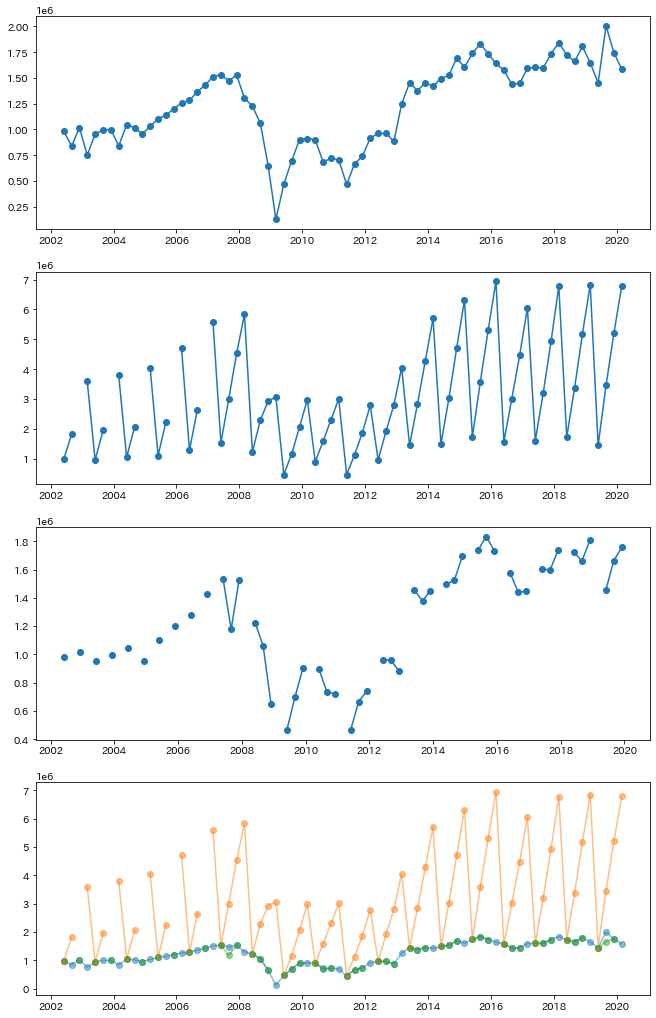

売上総利益


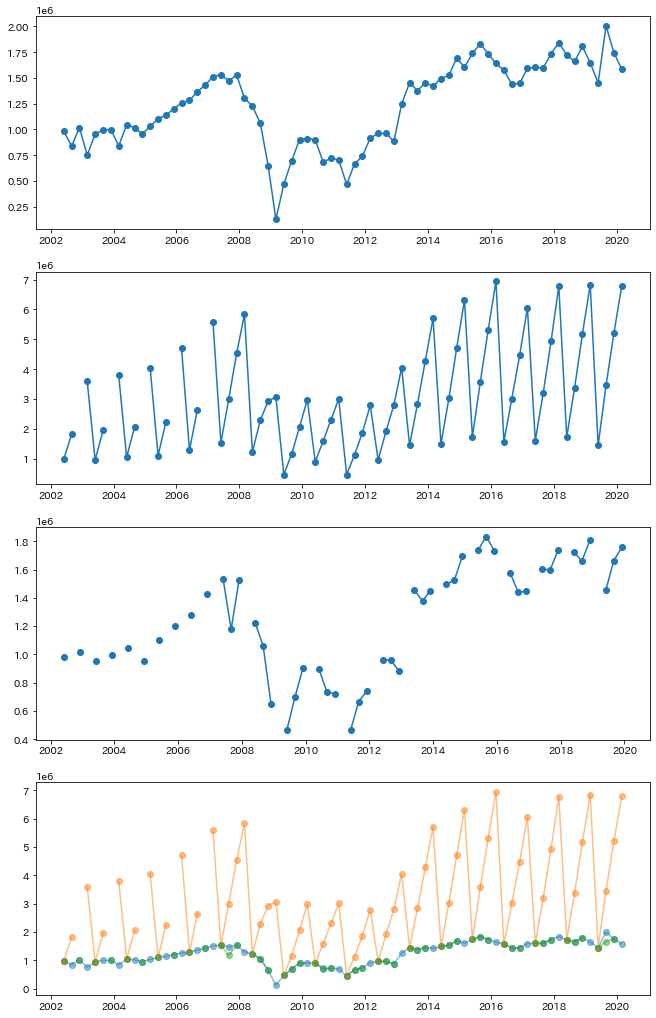

売上総利益


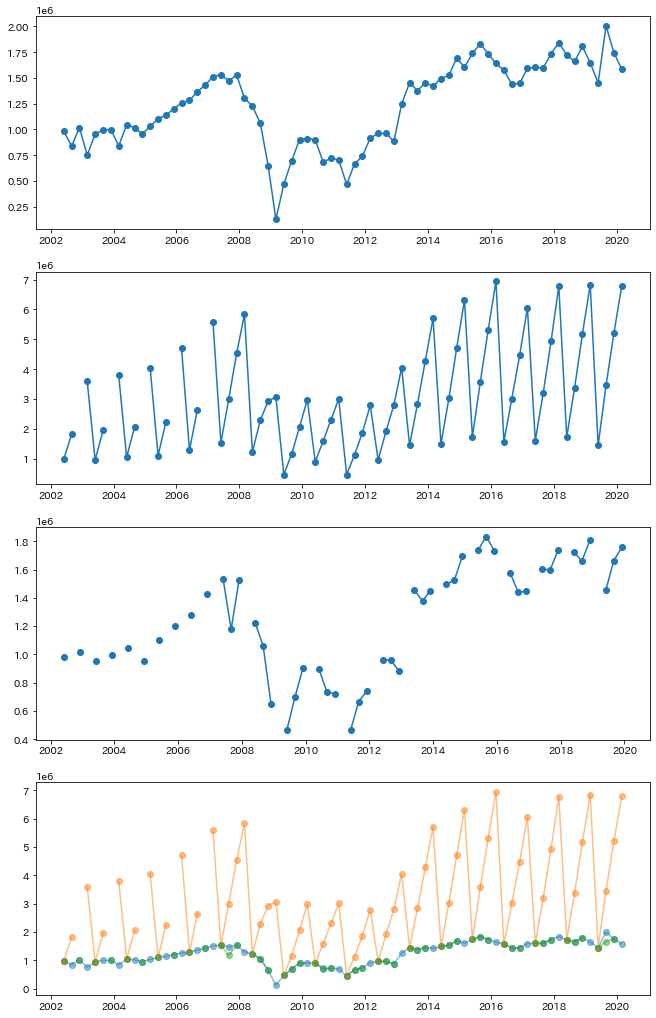

売上総利益


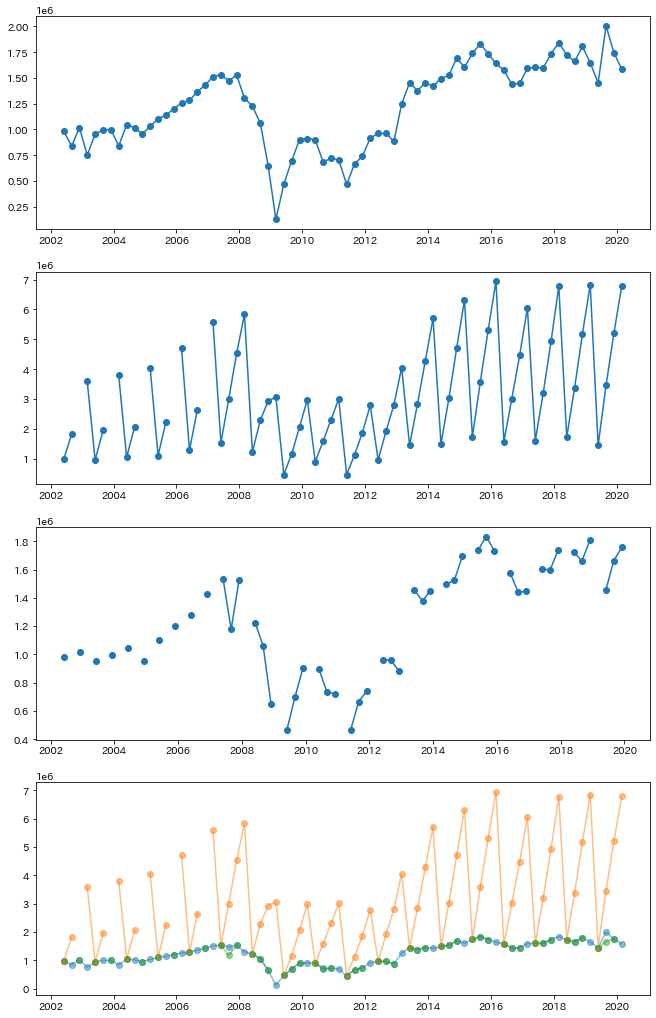

売上総利益


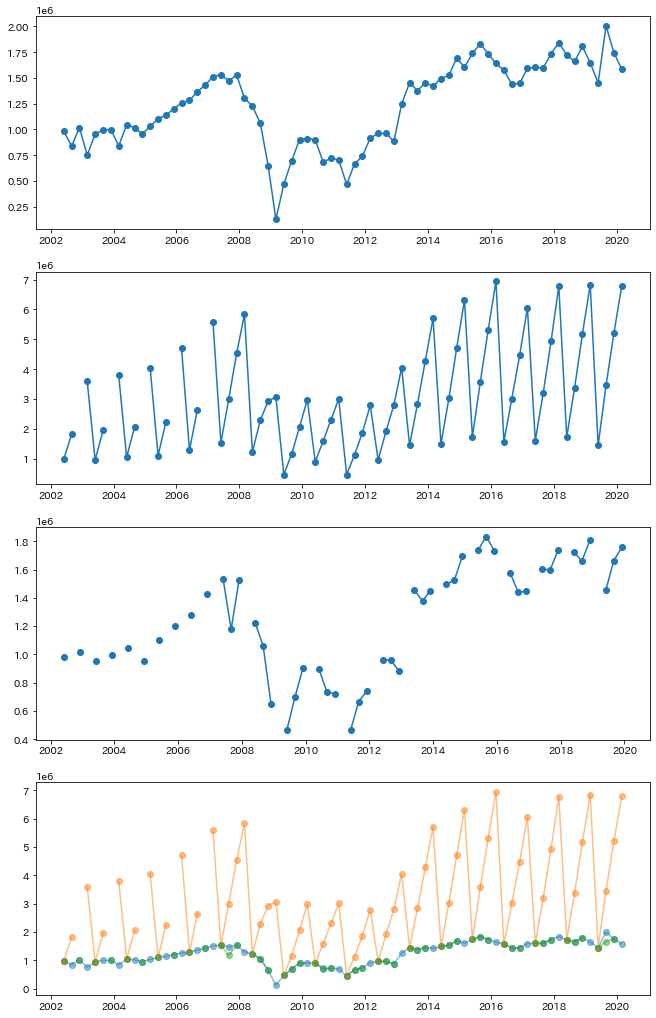

売上総利益


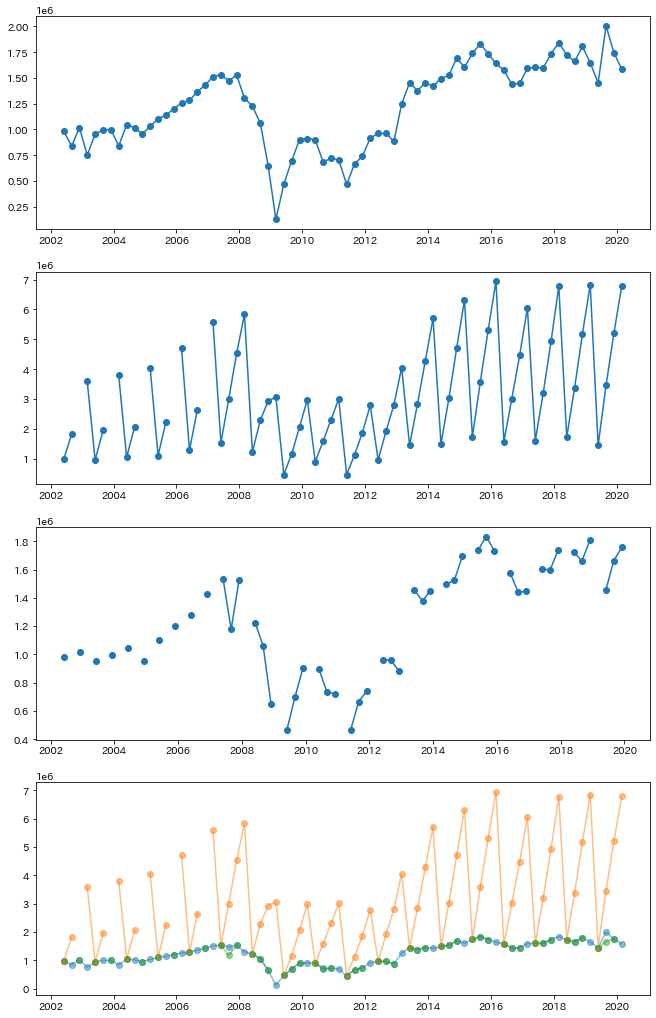

売上総利益


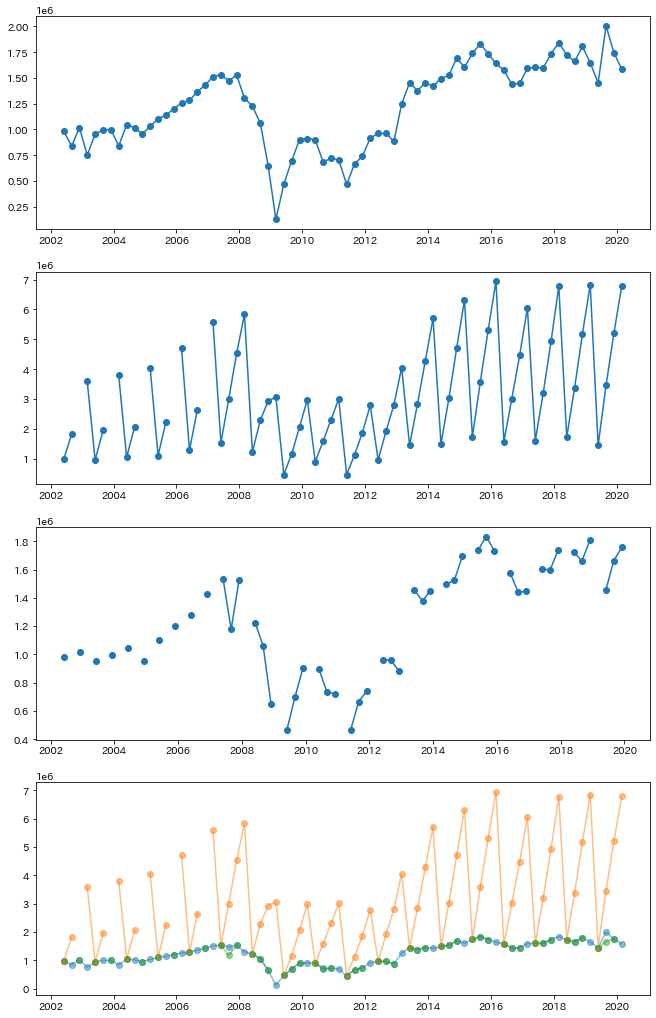

In [17]:
# Because of missing value in cumulatives, subtraction not working for the values
# after missings.
# Fill nan with 3 months

# Plot
for i in range(len(earning_v + account_v_pl)):
    var = (earning_v + account_v_pl)[1]

    print(var)

    fig = plt.figure(figsize = (11, 6 * 3))

    ax1 = plt.subplot(411)
    ax1 = plt.plot(dataset.data["決算期"], dataset.data[var], marker="o")

    ax2 = plt.subplot(412)
    ax2 = plt.plot(dataset.data["決算期"], dataset.data[var + "［累計］"], marker="o")

    ax3 = plt.subplot(413)
    ax3 = plt.plot(dataset.data["決算期"], dataset.data[var + "［３ヵ月］"], marker="o")
    
    ax4 = plt.subplot(414)
    ax4 = plt.plot(dataset.data["決算期"], dataset.data[var], marker="o", alpha=0.5)
    ax4 = plt.plot(dataset.data["決算期"], dataset.data[var + "［累計］"], marker="o", alpha=0.5)
    ax4 = plt.plot(dataset.data["決算期"], dataset.data[var + "［３ヵ月］"], marker="o", alpha=0.5)

    plt.show()

So far, using subtracted cumulative values for prediction, fill nan with 3 months data.

## Missing Value

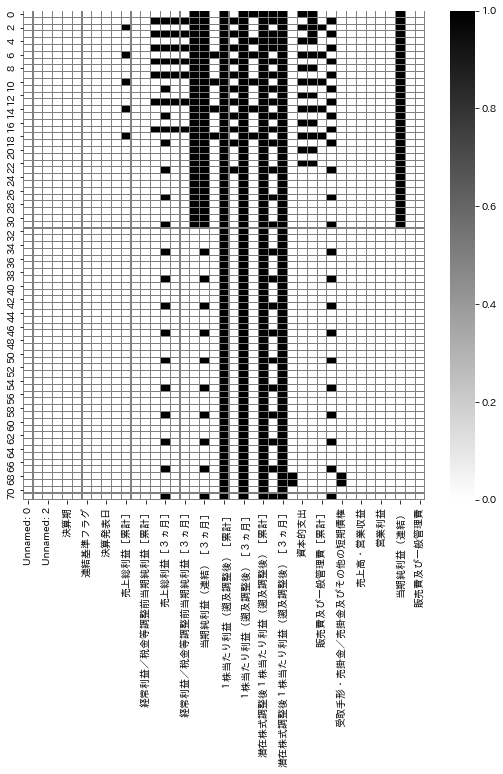

In [11]:
# Check Missing Value
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(dataset.data.isna(), cmap="binary", linewidths=.05, linecolor="gray")

In [12]:
# Use subtracted cumulated values

# select columns
col = date_col + ["決算月数"] + [i for i in earning_v + account_v_pl] + account_v_bs
dataset.extract(col)

In [13]:
dataset.data.head()

,決算期,決算発表日,決算月数,売上高・営業収益,売上総利益,営業利益,経常利益／税金等調整前当期純利益,当期純利益（連結）,１株当たり利益,販売費及び一般管理費,棚卸資産,資本的支出,期末従業員数,受取手形・売掛金／売掛金及びその他の短期債権
0,2002-06-01,2002-08-07,3.0,4021134.0,980461.0,394518.0,449936.0,NaN,100.80,585942.0,960431.0,NaN,NaN,1292182.0
1,2002-09-01,2002-12-26,6.0,3592288.0,840121.0,290505.0,264525.0,NaN,17.64,549617.0,927040.0,808702.0,NaN,1245733.0
2,2002-12-01,2003-02-05,9.0,4460037.0,1016004.0,425241.0,449835.0,NaN,103.23,636567.0,1042173.0,NaN,NaN,1339274.0
3,2003-03-01,2003-07-31,12.0,3428094.0,750722.0,161382.0,62356.0,NaN,-10.35,543536.0,1025838.0,1610229.0,NaN,1475797.0
4,2003-06-01,2003-08-05,3.0,4092939.0,953636.0,340772.0,371279.0,NaN,64.83,612864.0,1054208.0,NaN,NaN,1335846.0


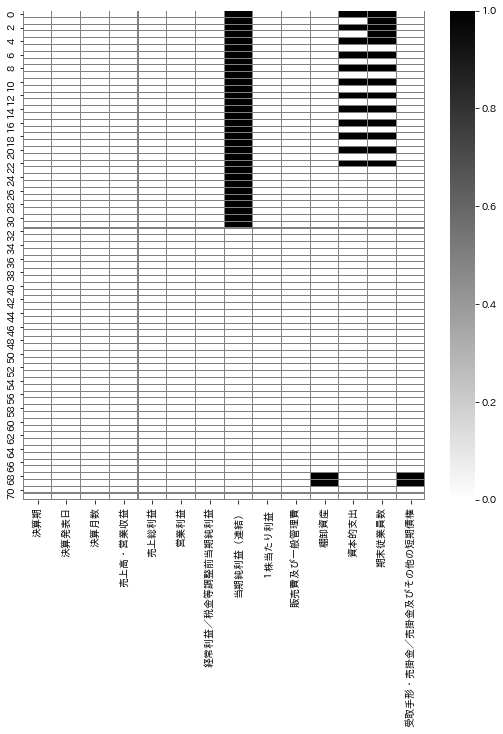

In [14]:
# Check Missing Value
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(dataset.data.isna(), cmap="binary", linewidths=.05, linecolor="gray")

In [15]:
# Check Missing Month for 
# '売上総利益', '１株当たり利益', '販売費及び一般管理費', '資本的支出', '期末従業員数'

dataset.data[dataset.data['売上総利益'].isna()]
# The missing value are seen in Q3 for '売上総利益', '１株当たり利益', '販売費及び一般管理費'
# can be filled with [3ヶ月]

# --> dealt

,決算期,決算発表日,決算月数,売上高・営業収益,売上総利益,営業利益,経常利益／税金等調整前当期純利益,当期純利益（連結）,１株当たり利益,販売費及び一般管理費,棚卸資産,資本的支出,期末従業員数,受取手形・売掛金／売掛金及びその他の短期債権


In [20]:
account_v_bs

['棚卸資産', '資本的支出', '期末従業員数', '受取手形・売掛金／売掛金及びその他の短期債権']

棚卸資産


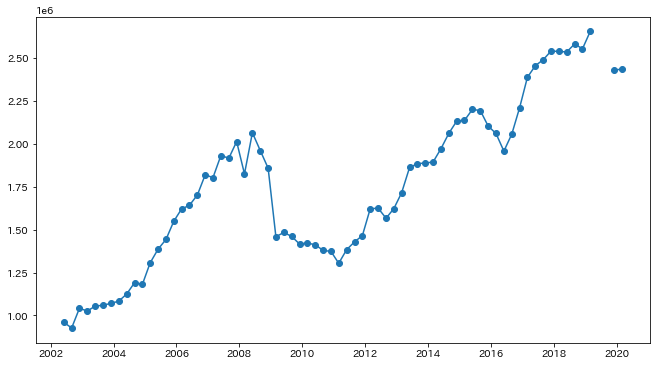

資本的支出


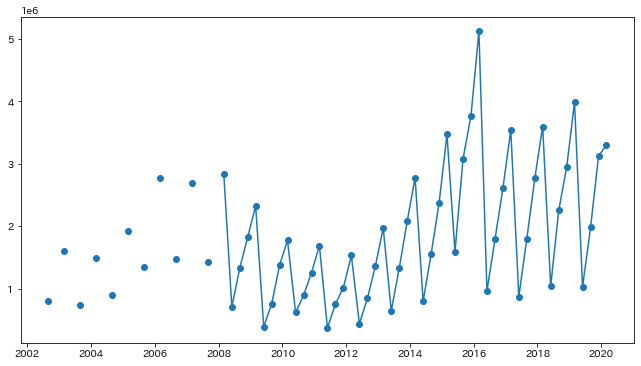

期末従業員数


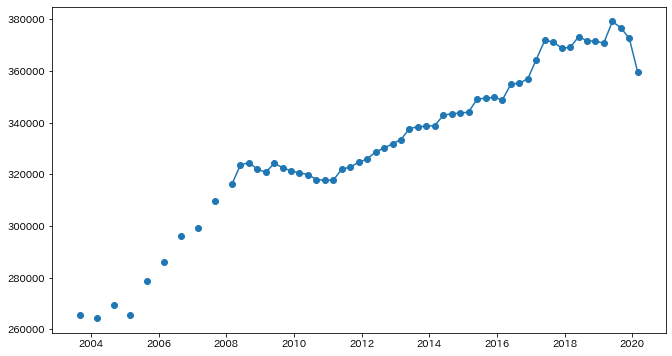

受取手形・売掛金／売掛金及びその他の短期債権


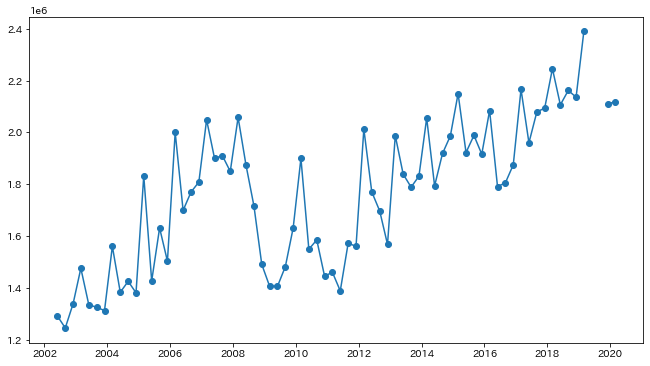

In [30]:
# Missing value lasted

# Plot
for i in range(len(account_v_bs)):
    var = account_v_bs[i]
    print(var)
    fig = plt.figure(figsize = (11, 6))
    ax = plt.subplot()
    ax = plt.plot(dataset.data["決算期"], dataset.data[var], marker="o")
    plt.show()

In [32]:
# '棚卸資産', '期末従業員数', '受取手形・売掛金／売掛金及びその他の短期債権' 
# are the value at the observation point (決算発表日)
# The missing can be filled with LOCF or interpolation

In [33]:
# '資本的支出' is also showned in B/S, but it seems like cumulative (or just seasonal?)
dataset.data[["決算期", "資本的支出"]].iloc[52: 64]

,決算期,資本的支出
52,2015-06-01,1594721.0
53,2015-09-01,3079472.0
54,2015-12-01,3773177.0
55,2016-03-01,5121960.0
56,2016-06-01,960066.0
57,2016-09-01,1791094.0
58,2016-12-01,2610166.0
59,2017-03-01,3541437.0
60,2017-06-01,872490.0
61,2017-09-01,1803601.0


In [38]:
# The missings are seen in Q1 and Q3 at the bigining of the periods
dataset.data[["決算期", "資本的支出"]].iloc[: 25]

,決算期,資本的支出
0,2002-06-01,NaN
1,2002-09-01,808702.0
2,2002-12-01,NaN
3,2003-03-01,1610229.0
4,2003-06-01,NaN
5,2003-09-01,743976.0
6,2003-12-01,NaN
7,2004-03-01,1488541.0
8,2004-06-01,NaN
9,2004-09-01,900594.0


In [20]:
# '期末従業員数' starts with missing values
dataset.data["期末従業員数"]
# fillnan with interpolation before cutting periods.

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
67    370870.0
68    379201.0
69    376762.0
70    372636.0
71    359542.0
Name: 期末従業員数, Length: 72, dtype: float64

## Complete data so far

In [24]:
# Instanciate Dataset class
dataset = ds.Dataset(file_path)
dataset.cleaning()
dataset.change_data_types(date_col, num_col)

# fillnan with "itp" method columns (account_v_bs)
dataset.fill_nan(account_v_bs, method="itp")

# cut half-year periods
dataset.cut(cut_period=(0, 11))

# generate quarterly data by subtracting cumsum
dataset.to_quarter(earning_v + account_v_pl)

# fillnan with "itp" method columns (earning_v + account_v_pl)
####

# select columns
col = date_col + ["決算月数"] + [i for i in earning_v + account_v_pl] + account_v_bs
dataset.extract(col)    

dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   決算期                     72 non-null     datetime64[ns]
 1   決算発表日                   72 non-null     datetime64[ns]
 2   決算月数                    72 non-null     float64       
 3   売上高・営業収益                72 non-null     float64       
 4   売上総利益                   72 non-null     float64       
 5   営業利益                    72 non-null     float64       
 6   経常利益／税金等調整前当期純利益        72 non-null     float64       
 7   当期純利益（連結）               40 non-null     float64       
 8   １株当たり利益                 72 non-null     float64       
 9   販売費及び一般管理費              72 non-null     float64       
 10  棚卸資産                    72 non-null     float64       
 11  資本的支出                   72 non-null     float64       
 12  期末従業員数                  72 non-null     float64     

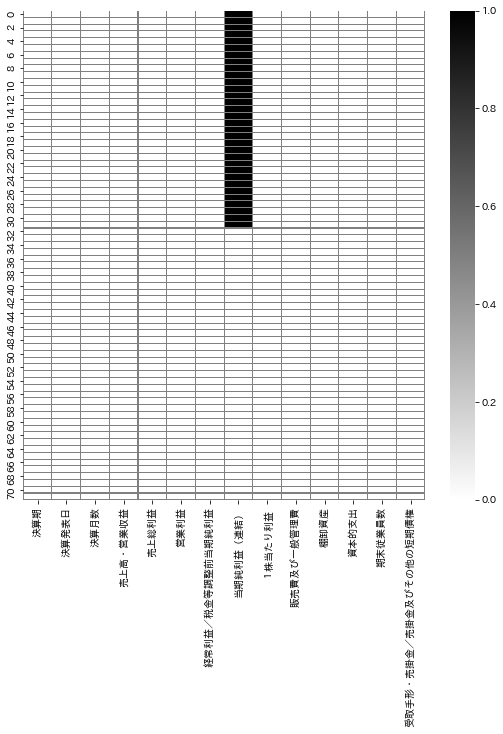

In [25]:
# Missing values
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(dataset.data.isna(), cmap="binary", linewidths=.05, linecolor="gray")

# the length of quaterly "当期純利益（連結）" is shorter, cannot deal with it.

In [26]:
# check nan value
dataset.data.isna().sum(axis=0)

決算期                        0
決算発表日                      0
決算月数                       0
売上高・営業収益                   0
売上総利益                      0
営業利益                       0
経常利益／税金等調整前当期純利益           0
当期純利益（連結）                 32
１株当たり利益                    0
販売費及び一般管理費                 0
棚卸資産                       0
資本的支出                      0
期末従業員数                     0
受取手形・売掛金／売掛金及びその他の短期債権     0
dtype: int64

決算期


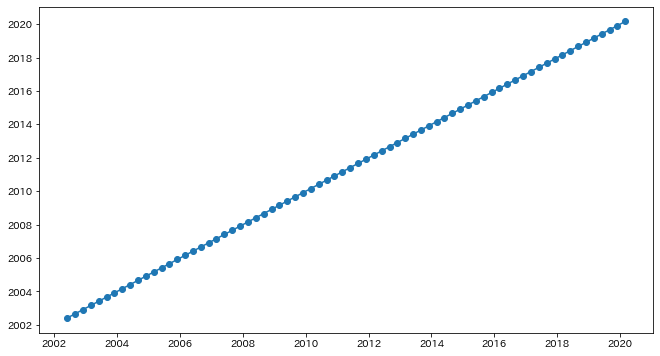

決算発表日


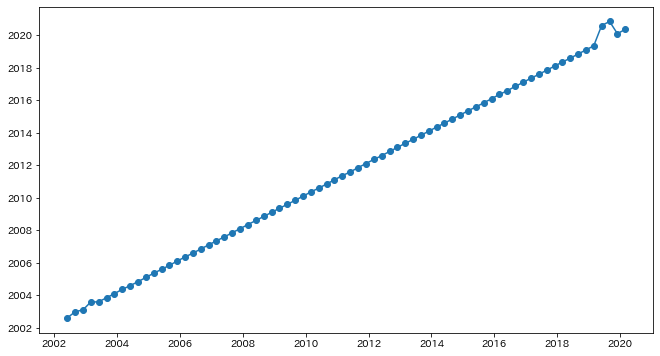

決算月数


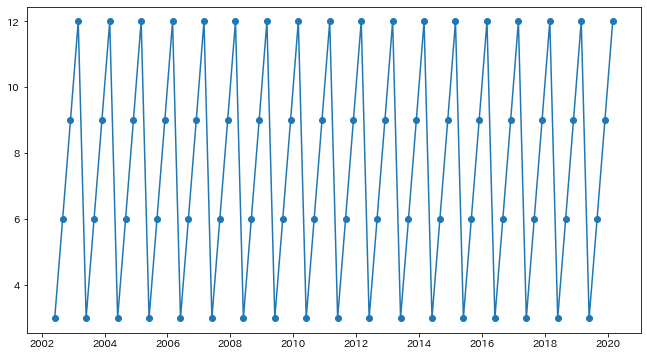

売上高・営業収益


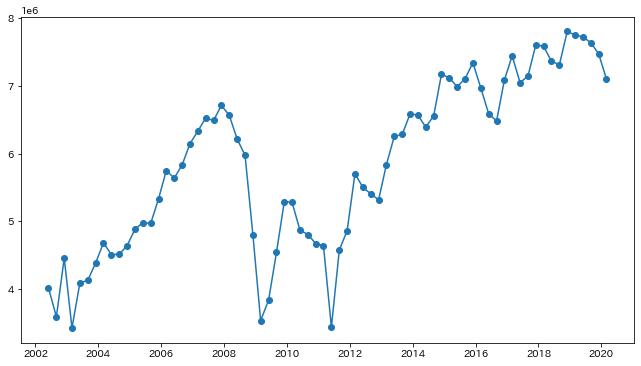

売上総利益


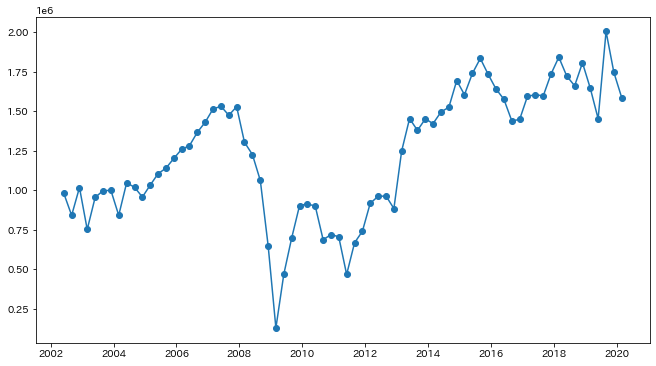

営業利益


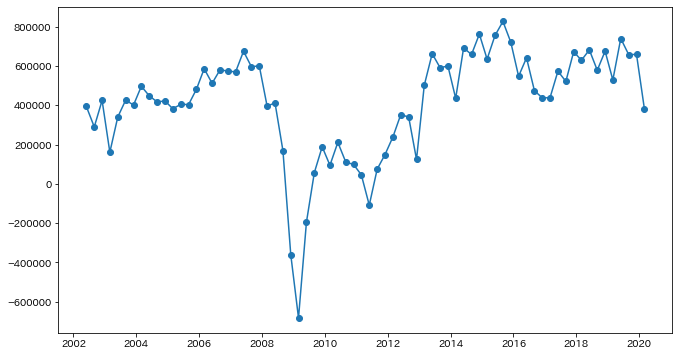

経常利益／税金等調整前当期純利益


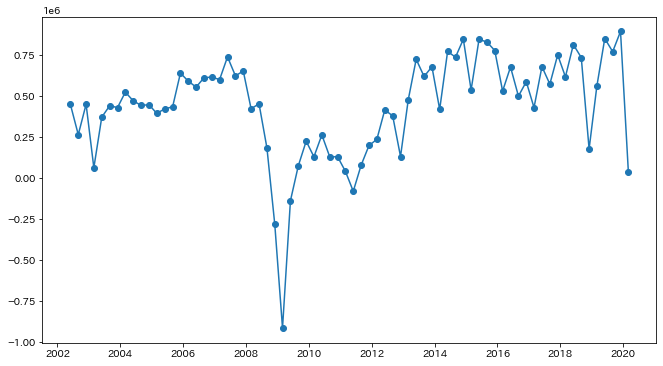

当期純利益（連結）


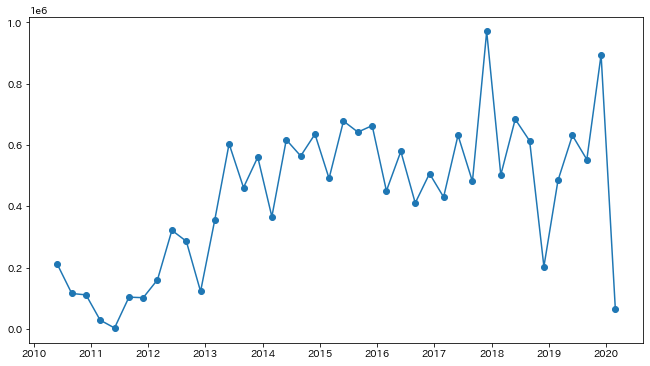

１株当たり利益


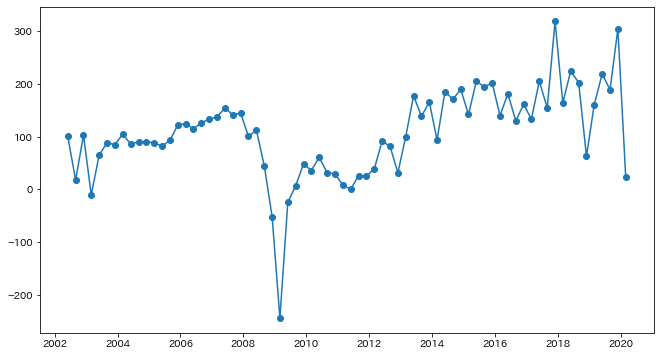

販売費及び一般管理費


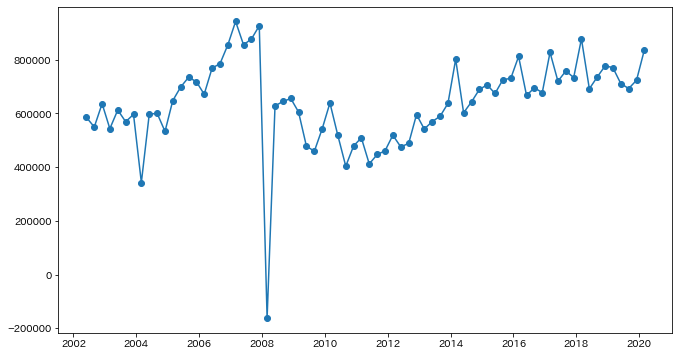

棚卸資産


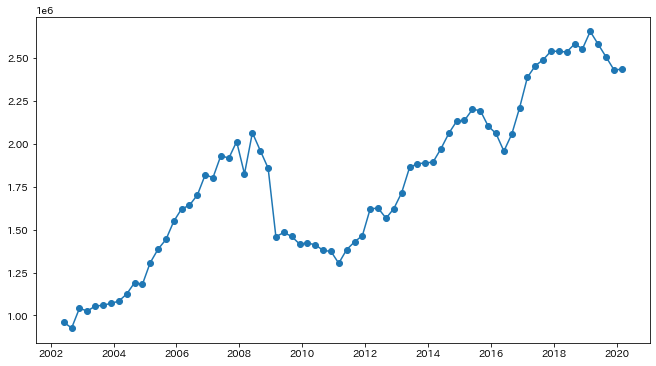

資本的支出


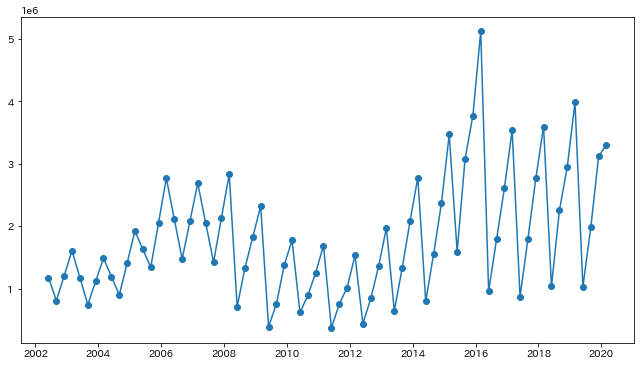

期末従業員数


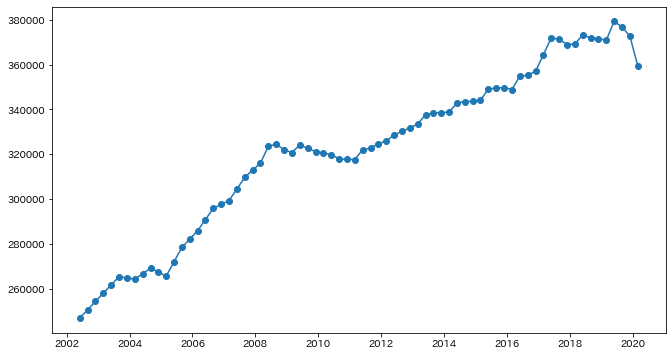

受取手形・売掛金／売掛金及びその他の短期債権


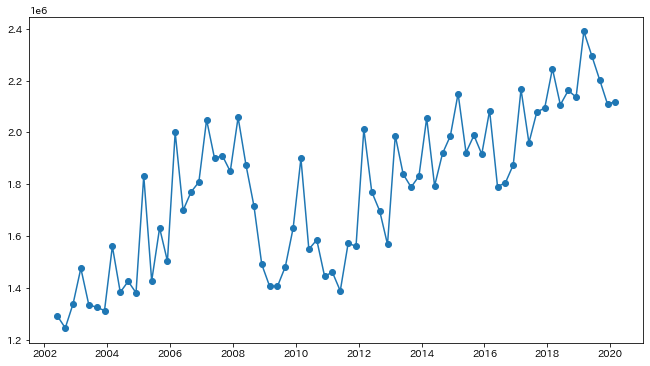

In [27]:
# Plot every columns
for var in dataset.data.columns:
    print(var)
    fig = plt.figure(figsize = (11, 6))
    ax = plt.subplot()
    ax = plt.plot(dataset.data["決算期"], dataset.data[var], marker="o")
    plt.show()